# Dropout Regularization For Neural Networks

Dropout is a regularization technique for neural network models proposed by Srivastava, et al. in their 2014 paper Dropout: A Simple Way to Prevent Neural Networks from Overfitting (download the PDF).



Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

After completing this tutorial, you will know:

1. How to create a dropout layer using the Keras API.

2. How to add dropout regularization to MLP, CNN, and RNN layers using the Keras API.

3. How to reduce overfitting by adding a dropout regularization to an existing model.

# Tutorial Overview
This tutorial is divided into three parts; they are:

1. Dropout Regularization in Keras

2. Dropout Regularization on Layers

3. Dropout Regularization Case Study

# Dropout Regularization in Keras

1. Keras supports dropout regularization.

2. The simplest form of dropout in Keras is provided by a Dropout core layer.

3. When created, the dropout rate can be specified to the layer as the probability of setting each input to the layer to zero. This is different from the definition of dropout rate from the papers, in which the rate refers to the probability of retaining an input.

4. Therefore, when a dropout rate of 0.8 is suggested in a paper (retain 80%), this will, in fact, will be a dropout rate of 0.2 (set 20% of inputs to zero).

5. Below is an example of creating a dropout layer with a 50% chance of setting inputs to zero.

layer = Dropout(0.5)

# Dropout Regularization on Layers

The Dropout layer is added to a model between existing layers and applies to outputs of the prior layer that are fed to the subsequent layer.

For example, given two dense layers:

...

model.append(Dense(32))

model.append(Dense(32))

...

We can insert a dropout layer between them, in which case the outputs or activations of the first layer have dropout applied to them, which are then taken as input to the next layer.

It is this second layer now which has dropout applied.

...

model.append(Dense(32))

model.append(Dropout(0.5))

model.append(Dense(32))

...

Dropout can also be applied to the visible layer, e.g. the inputs to the network.

This requires that you define the network with the Dropout layer as the first layer and add the input_shape argument to the layer to specify the expected shape of the input samples.

...
model.add(Dropout(0.5, input_shape=(2,)))
...

# MLP Dropout Regularization

The example below adds dropout between two dense fully connected layers.

# example of dropout between fully connected layers
from keras.layers import Dense
from keras.layers import Dropout
...

model.add(Dense(32))

model.add(Dropout(0.5))

model.add(Dense(1))
...

# CNN Dropout Regularization

Dropout can be used after convolutional layers (e.g. Conv2D) and after pooling layers (e.g. MaxPooling2D).

Often, dropout is only used after the pooling layers, but this is just a rough heuristic.

# example of dropout for a CNN

from keras.layers import Dense

from keras.layers import Conv2D

from keras.layers import MaxPooling2D

from keras.layers import Dropout

...

model.add(Conv2D(32, (3,3)))

model.add(Conv2D(32, (3,3)))

model.add(MaxPooling2D())

model.add(Dropout(0.5))

model.add(Dense(1))

...

In this case, dropout is applied to each element or cell within the feature maps.

An alternative way to use dropout with convolutional neural networks is to dropout entire feature maps from the convolutional layer which are then not used during pooling. This is called spatial dropout (or “SpatialDropout“).

Spatial Dropout is provided in Keras via the SpatialDropout2D layer (as well as 1D and 3D versions).

# example of spatial dropout for a CNN

from keras.layers import Dense

from keras.layers import Conv2D

from keras.layers import MaxPooling2D

from keras.layers import SpatialDropout2D

...

model.add(Conv2D(32, (3,3)))

model.add(Conv2D(32, (3,3)))

model.add(SpatialDropout2D(0.5))

model.add(MaxPooling2D())

model.add(Dense(1))

...

# RNN Dropout Regularization

The example below adds dropout between two layers: an LSTM recurrent layer and a dense fully connected layers.

# example of dropout between LSTM and fully connected layers

from keras.layers import Dense

from keras.layers import LSTM

from keras.layers import Dropout

...

model.add(LSTM(32))

model.add(Dropout(0.5))

model.add(Dense(1))

...

This example applies dropout to, in this case, 32 outputs from the LSTM layer provided as input to the Dense layer.

Alternately, the inputs to the LSTM may be subjected to dropout. In this case, a different dropout mask is applied to each time step within each sample presented to the LSTM.

# example of dropout before LSTM layer

from keras.layers import Dense

from keras.layers import LSTM

from keras.layers import Dropout

...

model.add(Dropout(0.5, input_shape=(...)))

model.add(LSTM(32))

model.add(Dense(1))

...

Keras supports Variational RNNs (i.e. consistent dropout across the time steps of a sample for inputs and recurrent inputs) via two arguments on the recurrent layers, namely “dropout” for inputs and “recurrent_dropout” for recurrent inputs.

# example of variational LSTM dropout

from keras.layers import Dense

from keras.layers import LSTM

from keras.layers import Dropout

...

model.add(LSTM(32, dropout=0.5, recurrent_dropout=0.5))

model.add(Dense(1))

...

# Dropout Regularization Case Study

# Binary Classification Problem
We will use a standard binary classification problem that defines two two-dimensional concentric circles of observations, one circle for each class.

Each observation has two input variables with the same scale and a class output value of either 0 or 1. This dataset is called the “circles” dataset because of the shape of the observations in each class when plotted.

We can use the make_circles() function to generate observations from this problem. We will add noise to the data and seed the random number generator so that the same samples are generated each time the code is run.

In [15]:
# generate two circles dataset
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
# example of batch normalization for an mlp
from keras.layers import Dense
from keras.layers import BatchNormalization,Activation,Dropout
from matplotlib import pyplot


In [2]:
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)


In [3]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))


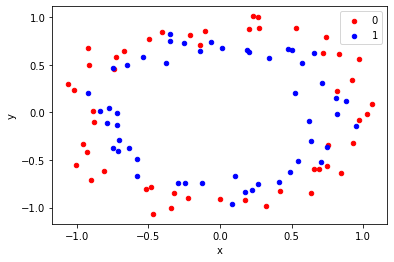

In [4]:
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

## Overfit Multilayer Perceptron

In [5]:
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)


In [6]:
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

Next, we can define the model.

The hidden layer uses 500 nodes in the hidden layer and the rectified linear activation function. A sigmoid activation function is used in the output layer in order to predict class values of 0 or 1.

The model is optimized using the binary cross entropy loss function, suitable for binary classification problems and the efficient Adam version of gradient descent.

In [10]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 41ms/step - loss: 0.0324 - accuracy: 1.0000 - val_loss: 0.9314 - val_accuracy: 0.7857
Epoch 1502/4000
1/1 [==============================] - 0s 61ms/step - loss: 0.0323 - accuracy: 1.0000 - val_loss: 0.9322 - val_accuracy: 0.7857
Epoch 1503/4000
1/1 [==============================] - 0s 62ms/step - loss: 0.0323 - accuracy: 1.0000 - val_loss: 0.9330 - val_accuracy: 0.7857
Epoch 1504/4000
1/1 [==============================] - 0s 60ms/step - loss: 0.0322 - accuracy: 1.0000 - val_loss: 0.9338 - val_accuracy: 0.7857
Epoch 1505/4000
1/1 [==============================] - 0s 58ms/step - loss: 0.0322 - accuracy: 1.0000 - val_loss: 0.9345 - val_accuracy: 0.7857
Epoch 1506/4000
1/1 [==============================] - 0s 63ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 0.9351 - val_accuracy: 0.7857
Epoch 1507/4000
1/1 [==============================] - 0s 55ms/step - loss: 0.0321 - accuracy: 1.0000

In [12]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.771


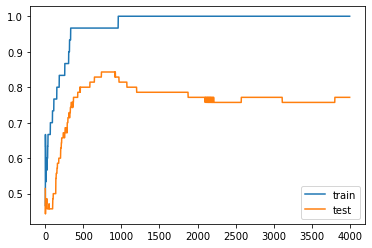

In [13]:
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# **Overfit MLP With Dropout Regularization**

In [16]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=1)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 44ms/step - loss: 0.3583 - accuracy: 0.8000 - val_loss: 0.4897 - val_accuracy: 0.7429
Epoch 1502/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.3087 - accuracy: 0.8667 - val_loss: 0.4897 - val_accuracy: 0.7571
Epoch 1503/4000
1/1 [==============================] - 0s 42ms/step - loss: 0.2599 - accuracy: 0.9333 - val_loss: 0.4899 - val_accuracy: 0.7571
Epoch 1504/4000
1/1 [==============================] - 0s 63ms/step - loss: 0.2660 - accuracy: 0.9000 - val_loss: 0.4902 - val_accuracy: 0.7571
Epoch 1505/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.2357 - accuracy: 0.9333 - val_loss: 0.4902 - val_accuracy: 0.7571
Epoch 1506/4000
1/1 [==============================] - 0s 55ms/step - loss: 0.2577 - accuracy: 0.9333 - val_loss: 0.4908 - val_accuracy: 0.7571
Epoch 1507/4000
1/1 [==============================] - 0s 41ms/step - loss: 0.2891 - accuracy: 0.8667

In [18]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.967, Test: 0.771


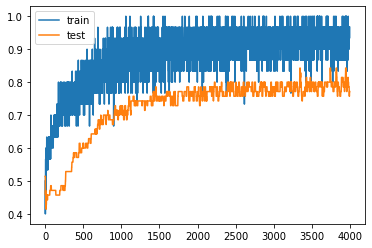

In [19]:
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()